In [14]:
from PIL import Image  

import numpy as np  
#import sdf2circle as sdf
#import evol_cv as chanvese
import LBF_EVOL as lbf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import measure,draw 
from skimage import filters
from scipy import signal

In [9]:
im= Image.open("1.bmp")#读取图像
gray=im.convert('L')#灰度图
img=np.array(gray)#转为数组

Img=img.astype(np.float)#转为浮点型

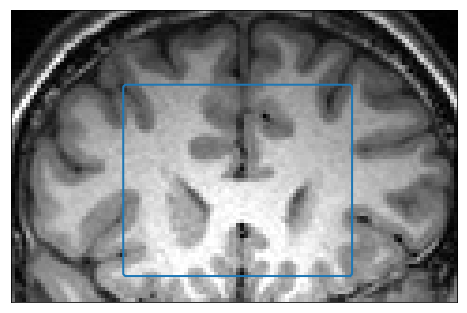

In [15]:
#参数设置
iterNum =300
lambda1 = 1.0
lambda2 = 2.0
nu = 0.004*255*255

c0 = 2


#######初始化
X=np.ones(Img.shape, dtype=np.float)
initialLSF = X*c0
initialLSF[20:71,30:91] = -c0

#显示初始轮廓
i=initialLSF<0
contours = measure.find_contours(i, 0.5)
#fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
fig, ax1 = plt.subplots(1,figsize=(8,8))
#ax0.imshow(img,plt.cm.gray)
ax1.imshow(img,plt.cm.gray)
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
    #ax1.axis('image')
    ax1.set_xticks([])
    ax1.set_yticks([])
plt.show()



In [16]:
u = initialLSF;

timestep = 0.1 
mu = 1 

epsilon = 1.0
sigma=3.0

#K=fspecial('gaussian',round(2*sigma)*2+1,sigma)
K = lbf.gaussian_kern( sigma)
I = Img
KI = signal.convolve2d(Img,K,'same')

KONE = signal.convolve2d(np.ones(Img.shape),K,'same'); 

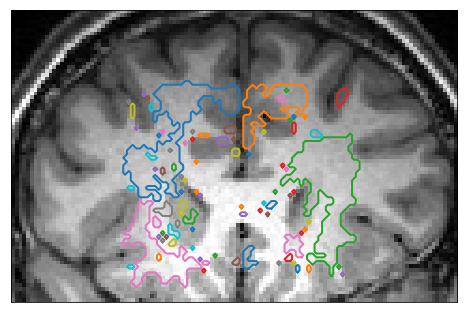

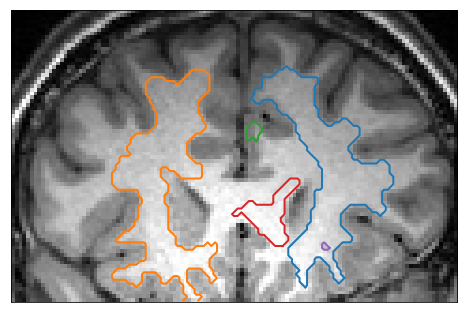

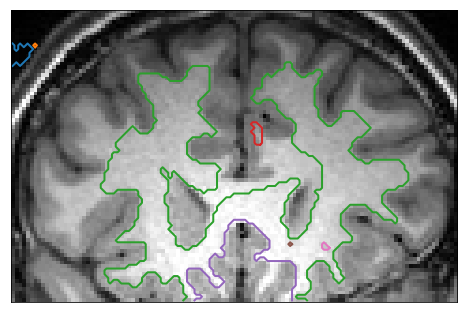

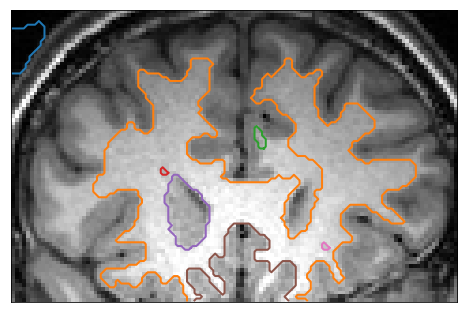

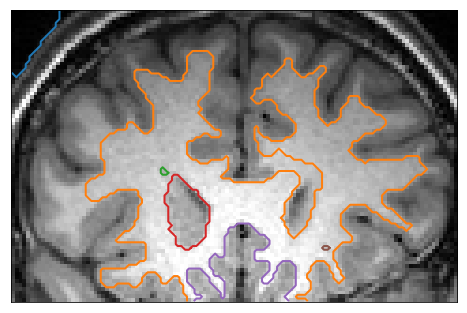

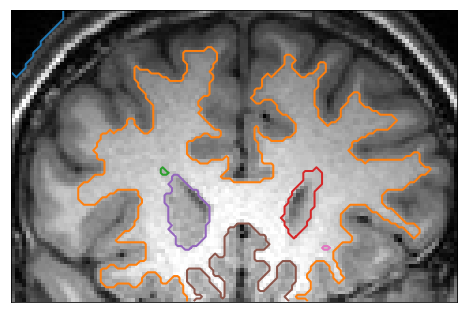

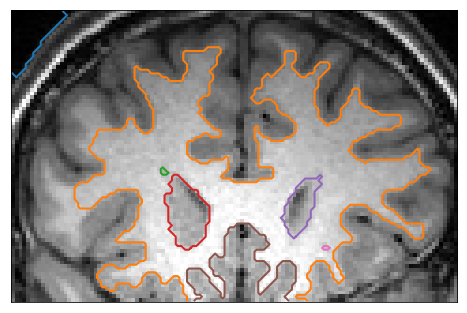

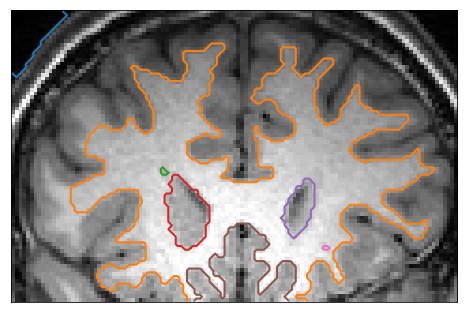

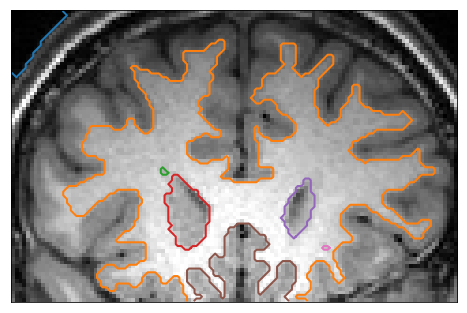

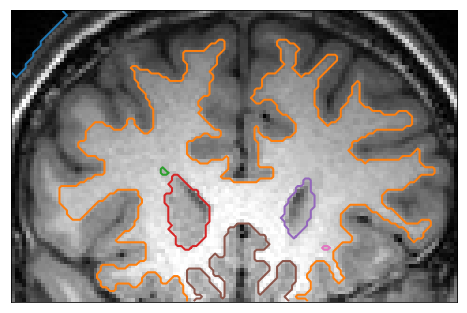

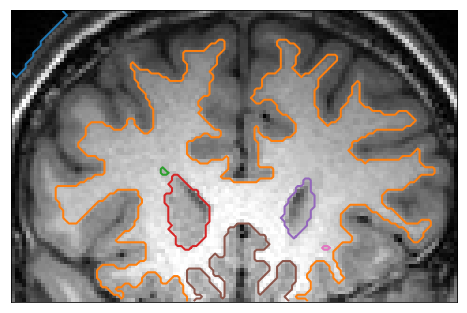

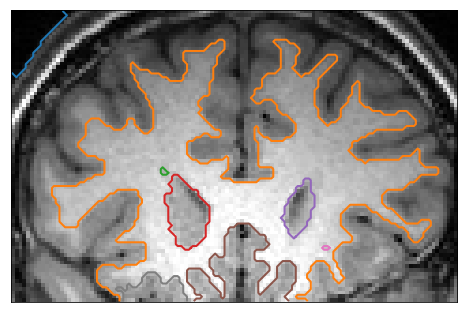

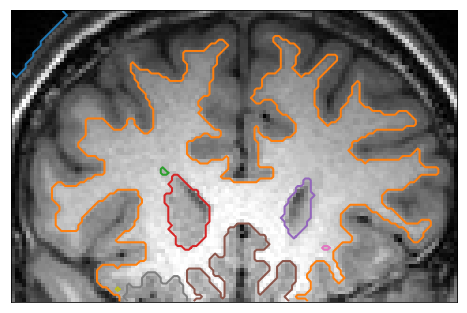

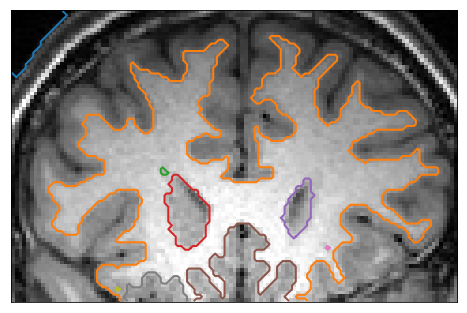

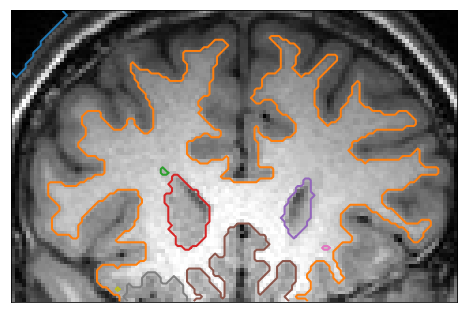

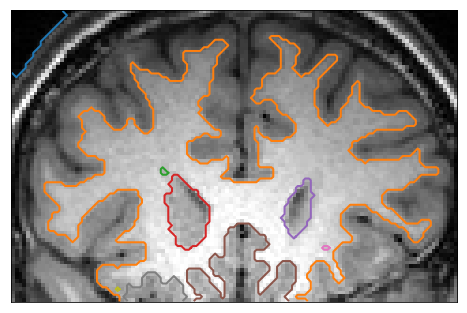

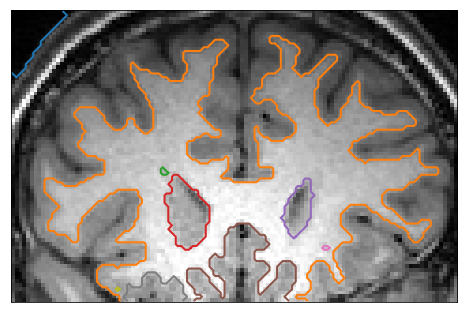

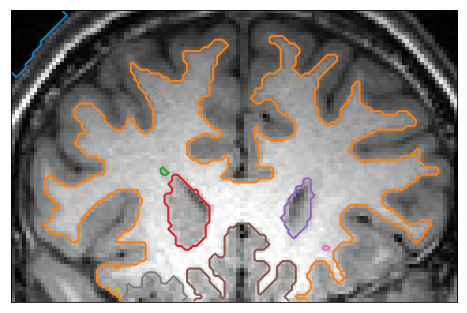

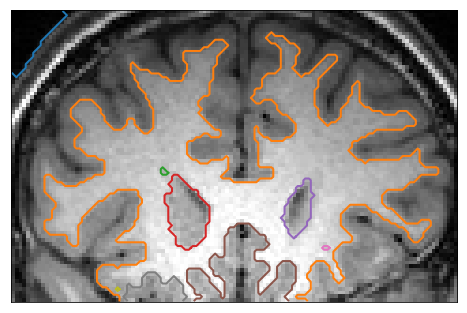

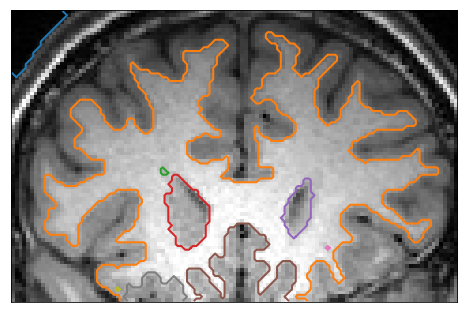

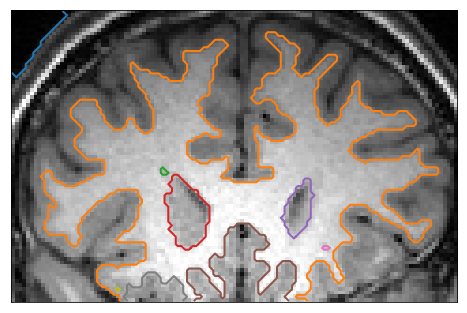

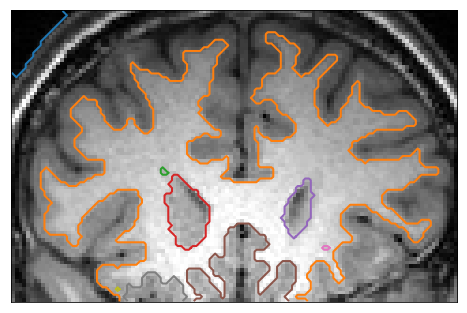

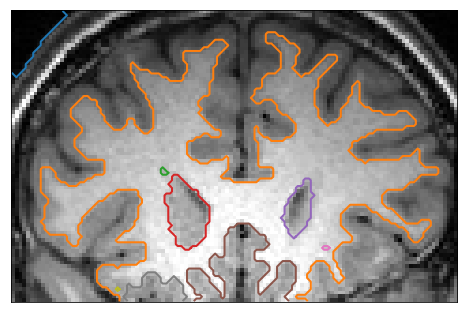

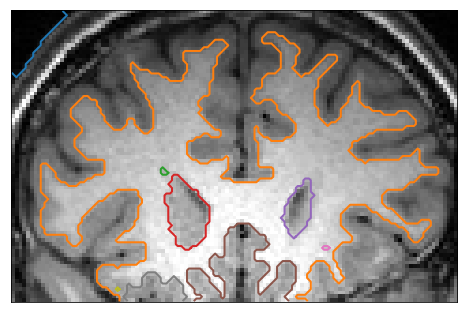

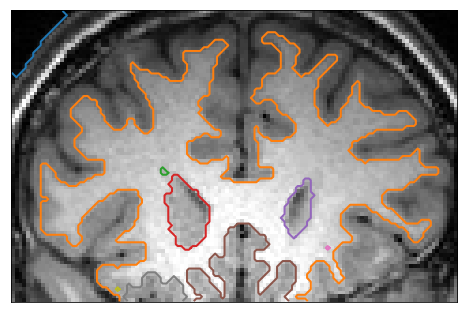

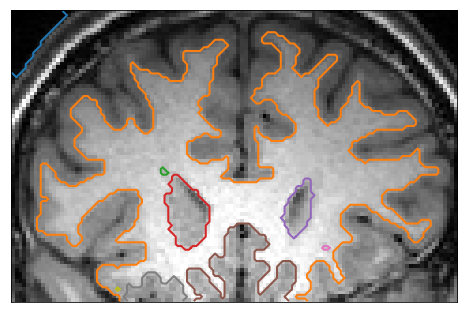

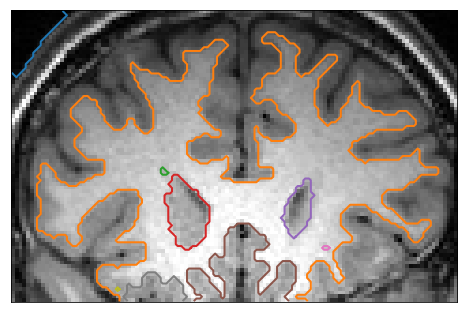

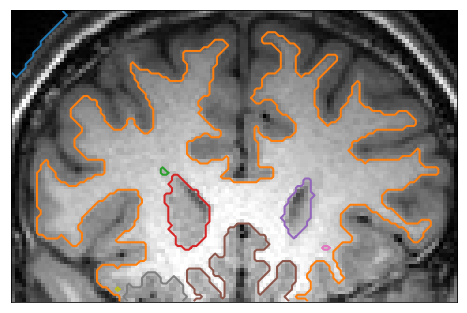

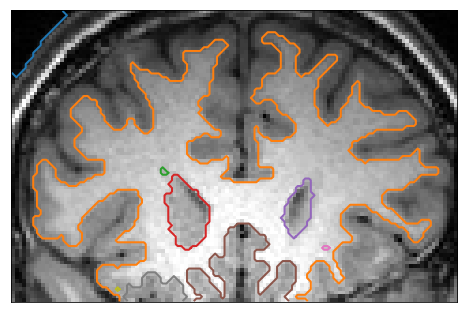

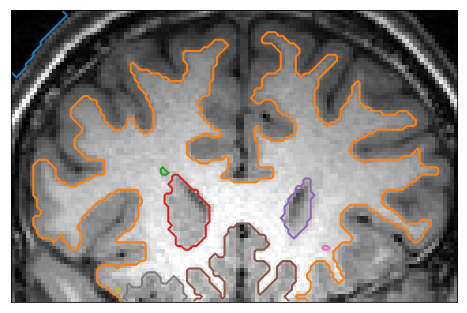

In [17]:
for n in range(iterNum):
    u=lbf.lbf(u,I,K,KI,KONE, nu,timestep,mu,lambda1,lambda2,epsilon)
    if n%10==0:
        i=u<0
        contours = measure.find_contours(i, 0.5)
        #fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
        fig, ax1 = plt.subplots(1,figsize=(8,8))
        #ax0.imshow(img,plt.cm.gray)
        ax1.imshow(img,plt.cm.gray)
        for n, contour in enumerate(contours):
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
            #ax1.axis('image')
            ax1.set_xticks([])
            ax1.set_yticks([])
        plt.show()



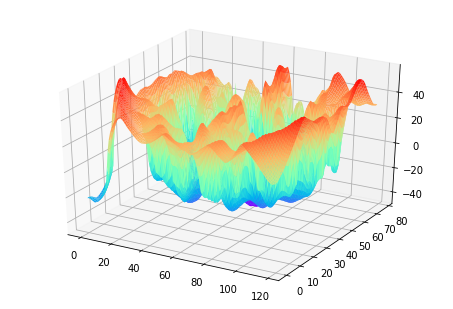

In [18]:
figure = plt.figure()
ax = Axes3D(figure)
[x,y]=u.shape
X = np.arange(0, y, 1)
Y = np.arange(0, x, 1)
#网格化数据
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='rainbow')

plt.show()